# Machine Intelligence 1

$\Large{Group: ALT}$  

## Gradient methods for parameter optimization
### Comparison of gradient descent methods

In [1]:
import math
import numpy as np
import itertools
from tabulate import tabulate
import matplotlib.pyplot as plt
import time
import random

In [2]:
training_data = np.array(([-1,0.1],[0.3,0.5],[2,0.5]))

In [3]:
x_pre = training_data[:,0]
y = training_data[:,1]
x = np.vstack((np.ones(len(x_pre)),x_pre))

In [4]:
weights_in = np.array([-0.45,0.2])

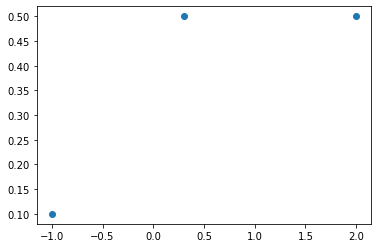

In [5]:
plt.scatter(x_pre,y)
plt.show()

__a) Gradient Descent: Implement a steepest descent procedure.__

In [6]:
t_max = 3000
eta = 0.1
small_error = 1e-6
normalize = 1./len(y)

In [7]:
def gradient_quadratic(weights,x_in, y_true):
    Hessian =np.dot(x_in,x_in.T)
    gradient = np.dot(Hessian,weights) - np.dot(x_in,y_true.T)
    return gradient

In [8]:
def quad_error(y_calc,yT):
    quad_error = np.sum(0.5*(yT - y_calc)**2)
    return quad_error

In [9]:
def gradient_descent(weights,x_in, y_true,eta):
    E_previous = 0.
    t = 0
    weight_updates = np.zeros((2,t_max+1))
    weight_updates[:,0] = weights_in
    while(True):
        delta_ET = 0.
        y_out = np.dot(weight_updates.T[t],x_in)
        sum_e = quad_error(y_out,y_true)
        Et = sum_e*normalize
        delta_ET = Et-E_previous
        error_test = abs(delta_ET)/Et
        if error_test < small_error or t >= t_max:
            print("Stopped after t ",t," iterations")
            break
        else:
            E_previous = Et
            t += 1
            weight_updates[:,t] = weight_updates[:,t-1] - eta*gradient_quadratic(weight_updates[:,t-1],x_in,y_true)
        
    return [weight_updates,t]

In [10]:
[w_gdescent,t_gdescent] = gradient_descent(weights_in,x,y,eta)
w_gdescent = w_gdescent[:,:t_gdescent]

Stopped after t  32  iterations


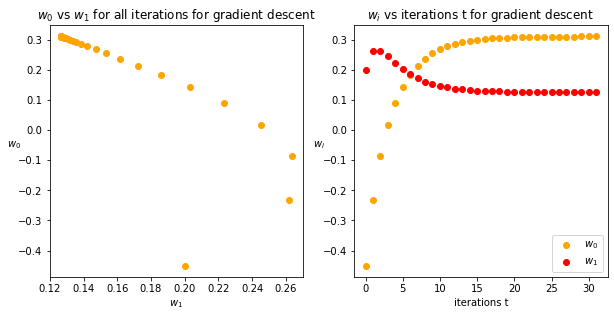

In [11]:
plt.figure(figsize=(10,7))

plt.subplot(121)
plt.scatter(w_gdescent[1],w_gdescent[0],color = "orange")
plt.xlabel("$w_1$")
plt.ylabel("$w_0$",rotation="horizontal")
plt.title("$w_0$ vs $w_1$ for all iterations for gradient descent")

plt.subplot(122)
plt.scatter(np.arange(t_gdescent),w_gdescent[0],color = "orange", label = "$w_0$")
plt.scatter(np.arange(t_gdescent),w_gdescent[1],color = "red", label = "$w_1$")
plt.legend()
plt.xlabel("iterations t")
plt.ylabel("$w_i$",rotation="horizontal")
plt.title("$w_i$ vs iterations t for gradient descent")

plt.subplots_adjust(bottom=0.25, top=0.75,wspace = 0.2)

plt.show()

__b) Line Search: Implement a line search procedure.__

In [12]:
def calc_eta_linesearch(gradient,x_in):
    Hessian =np.dot(x_in,x_in.T)
    numerator = np.dot(gradient.T,gradient)
    denominator_p = np.dot(gradient.T,Hessian)
    denominator = np.dot(denominator_p,gradient)
    eta_line = numerator/denominator
    return eta_line

In [13]:
def line_search(weights,x_in, y_true):
    E_previous = 0.
    t = 0
    weight_updates = np.zeros((2,t_max+1))
    weight_updates[:,0] = weights_in
    while(True):
        delta_ET = 0.
        grad_w = gradient_quadratic(weight_updates[:,t],x_in,y_true)
        eta_line = calc_eta_linesearch(grad_w,x_in) 
        y_out = np.dot(weight_updates.T[t],x_in)
        sum_e = quad_error(y_out,y_true)
        Et = sum_e*normalize
        delta_ET = Et-E_previous
        error_test = abs(delta_ET)/Et
        if error_test < small_error or t >= t_max:
            print("Stopped after t ",t," iterations")
            break
        else:
            E_previous = Et
            t += 1
            weight_updates[:,t] = weight_updates[:,t-1] - eta_line*gradient_quadratic(weight_updates[:,t-1],x_in,y_true)
        
    return [weight_updates,t]

In [14]:
[w_line,t_line] = line_search(weights_in,x,y)
w_line = w_line[:,:t_line]

Stopped after t  11  iterations


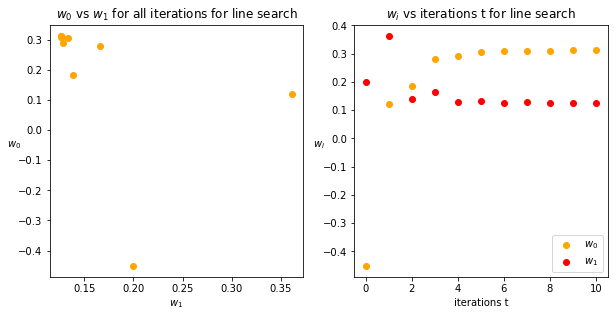

In [15]:
plt.figure(figsize=(10,7))

plt.subplot(121)
plt.scatter(w_line[1],w_line[0],color = "orange")
plt.xlabel("$w_1$")
plt.ylabel("$w_0$",rotation="horizontal")
plt.title("$w_0$ vs $w_1$ for all iterations for line search")

plt.subplot(122)
plt.scatter(np.arange(t_line),w_line[0],color = "orange", label = "$w_0$")
plt.scatter(np.arange(t_line),w_line[1],color = "red", label = "$w_1$")
plt.legend()
plt.xlabel("iterations t")
plt.ylabel("$w_i$",rotation="horizontal")
plt.title("$w_i$ vs iterations t for line search")

plt.subplots_adjust(bottom=0.25, top=0.75,wspace = 0.2)

plt.show()

__c) Conjugate Gradient: Implement a conjugate gradient procedure.__

In [16]:
def calc_eta_conj(gradient,x_in,conj_direction):
    Hessian =np.dot(x_in,x_in.T)
    numerator = -np.dot(conj_direction.T,gradient)
    denominator_p = np.dot(conj_direction.T,Hessian)
    denominator = np.dot(denominator_p,conj_direction)
    if numerator == 0:
        return numerator
    else:
        eta_conj = numerator/denominator
    return eta_conj

In [17]:
def calc_beta_conj(gradient_t1,gradient_t):
    numerator = -np.dot(gradient_t1.T,gradient_t1)
    denominator = np.dot(gradient_t,gradient_t)
    if numerator == 0:
        return numerator
    else:
        beta_conj = numerator/denominator
    return beta_conj

In [18]:
def conjugate_gradient(weights,x_in, y_true):
    E_previous = 0.
    t = 0
    weight_updates = np.zeros((2,t_max+1))
    weight_updates[:,0] = weights_in
    g_t = gradient_quadratic(weights_in,x_in,y_true)
    conj_direction = -g_t
    while(True):
        delta_ET = 0.
        y_out = np.dot(weight_updates.T[t],x_in)  
        sum_e = quad_error(y_out,y_true)
        Et = sum_e*normalize
        delta_ET = Et-E_previous
        error_test = abs(delta_ET)/Et
        if error_test < small_error or t >= t_max:
            print("Stopped after t ",t," iterations")
            break
        else:
            E_previous = Et
            eta_conj = calc_eta_conj(g_t,x_in,conj_direction)
            weight_updates[:,t+1] = weight_updates[:,t] + eta_conj*conj_direction
            g_t1 = gradient_quadratic(weight_updates[:,t+1],x_in,y_true)
            beta_conj = calc_beta_conj(g_t1,g_t)
            conj_direction = g_t1 + beta_conj*conj_direction

            g_t = g_t1
            t += 1
    return [weight_updates,t]

In [19]:
[w_conj,t_conj] = conjugate_gradient(weights_in,x,y)
w_conj = w_conj[:,:t_conj]
w_conj

Stopped after t  3  iterations


array([[-0.45      ,  0.12145273,  0.31178203],
       [ 0.2       ,  0.36099833,  0.12665685]])

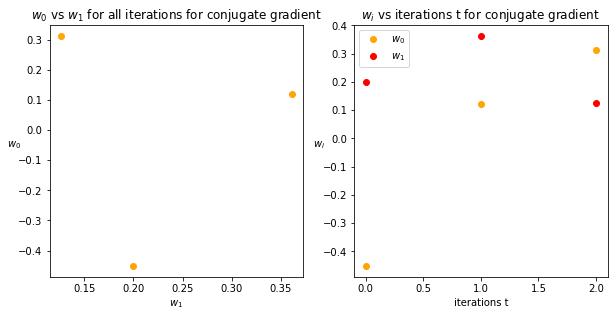

In [20]:
plt.figure(figsize=(10,7))

plt.subplot(121)
plt.scatter(w_conj[1],w_conj[0],color = "orange")
plt.xlabel("$w_1$")
plt.ylabel("$w_0$",rotation="horizontal")
plt.title("$w_0$ vs $w_1$ for all iterations for conjugate gradient")

plt.subplot(122)
plt.scatter(np.arange(t_conj),w_conj[0],color = "orange", label = "$w_0$")
plt.scatter(np.arange(t_conj),w_conj[1],color = "red", label = "$w_1$")
plt.legend()
plt.xlabel("iterations t")
plt.ylabel("$w_i$",rotation="horizontal")
plt.title("$w_i$ vs iterations t for conjugate gradient")

plt.subplots_adjust(bottom=0.25, top=0.75,wspace = 0.2)

plt.show()